# gpx file

In [6]:
import gpxpy
import gpxpy.gpx
import glob
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 10000)

In [7]:
PATH = '/Users/dermotsheridan/Downloads/UCD/Project /garminproject/2021-10-11_garmin_connect_export/'

In [16]:
gpx_files = glob.glob(os.path.join(PATH,"*.gpx"))
gpx = gpxpy.parse(open(gpx_files[100]))
gpx

GPX(tracks=[GPXTrack(name='County Cavan - WK1 A 500s - 100s', segments=[GPXTrackSegment(points=[...])])])

In [17]:
gpx_track = gpx.tracks[0]
gpx_track

GPXTrack(name='County Cavan - WK1 A 500s - 100s', segments=[GPXTrackSegment(points=[...])])

# Track Summary

In [71]:
print("Name: " + gpx_track.name)
print("Description: " + str(gpx_track.description))
print("Start: " + str(gpx_track.get_time_bounds().start_time.isoformat()))
print("End: " + str(gpx_track.get_time_bounds().end_time))
 
bounds = gpx_track.get_bounds()
print("Latitude Bounds: (%f, %f)" % (bounds.min_latitude, bounds.max_latitude))
print("Longitude Bounds: (%f, %f)" % (bounds.min_longitude, bounds.max_longitude))

Name: County Cavan - WK1 A 500s - 100s
Description: None
Start: 2021-03-07T10:29:02+00:00
End: 2021-03-07 10:51:33+00:00
Latitude Bounds: (53.834309, 53.835833)
Longitude Bounds: (-7.439938, -7.437734)


In [19]:
#Duration returned in seconds
gpx_track.get_duration()*1./60

22.516666666666666

In [20]:
#What wat the length of the run? Length returned in meters. 2d .
gpx_track.length_2d()

3739.4507197010344

In [21]:
#What wat the length of the run? Length returned in meters. 3d 
gpx_track.length_3d()

3752.594385662573

# Quick Visualization

<AxesSubplot:xlabel='Longitude'>

<Figure size 864x648 with 0 Axes>

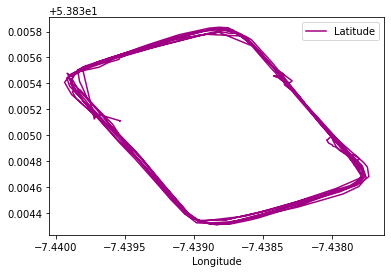

In [22]:
track_coords = [[point.latitude,point.longitude, point.elevation] 
                                for track in gpx.tracks 
                                    for segment in track.segments 
                                        for point in segment.points]
 
coords_df = pd.DataFrame(track_coords, columns=['Latitude','Longitude','Altitude'])
 
fig = plt.figure(figsize=(12,9))
coords_df.plot('Longitude','Latitude', color='#A00084', linewidth=1.5)

# multiple gpx files

Multiple GPX files - define a function to read them all at once.

In [64]:
import os
from glob import glob

def load_gpx_data(gpx_path, filter=""):
    gpx_files = glob(os.path.join(gpx_path, filter + "*.gpx"))
    gpx_data = []
    for file_idx, gpx_file in enumerate(gpx_files): 
        gpx = gpxpy.parse(open(gpx_file, 'r'))
        # Loop through tracks
        for track_idx, track in enumerate(gpx.tracks):
            track_name = track.name
            track_time = track.get_time_bounds().start_time
            track_length = track.length_3d()
            track_duration = track.get_duration()
            track_speed = track.get_moving_data().max_speed
            
            for seg_idx, segment in enumerate(track.segments):
                segment_length = segment.length_3d()
                for point_idx, point in enumerate(segment.points):
                    gpx_data.append([file_idx, os.path.basename(gpx_file), track_idx, track_name, 
                                     track_time, track_length, track_duration, track_speed, 
                                     seg_idx, segment_length, point.time, point.latitude, 
                                     point.longitude, point.elevation, segment.get_speed(point_idx)])
    return gpx_data

Build a DataFrame

looped though all of the run data and built up a two dimensional list of data. 

load that data into a Pandas DataFrame so we can easily sort, filter, group, etc.

In [65]:
gpx_path='/Users/dermotsheridan/Downloads/UCD/Project /garminproject/2021-10-11_garmin_connect_export/'
data = load_gpx_data(gpx_path, filter="")
df = pd.DataFrame(data, columns=['File_Index', 'File_Name', 'Index', 'Name',
                              'Time', 'Length', 'Duration', 'Max_Speed',
                              'Segment_Index', 'Segment_Length', 'Point_Time', 'Point_Latitude',
                              'Point_Longitude', 'Point_Elevation', 'Point_Speed'])

df.head()

,File_Index,File_Name,Index,Name,Time,Length,Duration,Max_Speed,Segment_Index,Segment_Length,Point_Time,Point_Latitude,Point_Longitude,Point_Elevation,Point_Speed
0,0,activity_4907266033.gpx,0,County Cavan Strength,2020-04-27 15:37:51+00:00,1044.396591,2538.0,1.807785,0,1044.396591,2020-04-27 15:37:51+00:00,53.897009,-7.492022,63.599998,3.044057
1,0,activity_4907266033.gpx,0,County Cavan Strength,2020-04-27 15:37:51+00:00,1044.396591,2538.0,1.807785,0,1044.396591,2020-04-27 15:37:54+00:00,53.897089,-7.492050,63.599998,1.747439
2,0,activity_4907266033.gpx,0,County Cavan Strength,2020-04-27 15:37:51+00:00,1044.396591,2538.0,1.807785,0,1044.396591,2020-04-27 15:38:01+00:00,53.897114,-7.492028,63.400002,0.395836
3,0,activity_4907266033.gpx,0,County Cavan Strength,2020-04-27 15:37:51+00:00,1044.396591,2538.0,1.807785,0,1044.396591,2020-04-27 15:38:10+00:00,53.897087,-7.492021,63.599998,0.363883
4,0,activity_4907266033.gpx,0,County Cavan Strength,2020-04-27 15:37:51+00:00,1044.396591,2538.0,1.807785,0,1044.396591,2020-04-27 15:38:15+00:00,53.897070,-7.492020,63.599998,0.481734


Pandas does a great job of detecting the data type of each column automatically. 

You can see the data type of each column below

In [66]:
df.dtypes

File_Index                                 int64
File_Name                                 object
Index                                      int64
Name                                      object
Time               datetime64[ns, SimpleTZ("Z")]
Length                                   float64
Duration                                 float64
Max_Speed                                float64
Segment_Index                              int64
Segment_Length                           float64
Point_Time         datetime64[ns, SimpleTZ("Z")]
Point_Latitude                           float64
Point_Longitude                          float64
Point_Elevation                          float64
Point_Speed                              float64
dtype: object

Clean up the DataFrame and convert the distances to km

In [67]:
cols = ['File_Index', 'Time', 'Length', 'Duration', 'Max_Speed']
tracks = df[cols].copy()
tracks['Length'] /= 1e3
tracks.drop_duplicates(inplace=True)
tracks.head()

,File_Index,Time,Length,Duration,Max_Speed
0,0,2020-04-27 15:37:51+00:00,1.044397,2538.0,1.807785
489,6,2017-08-30 18:45:21+00:00,0.996635,1108.0,2.269653
785,7,2019-11-10 10:25:52+00:00,0.984887,661.0,4.354305
911,10,2017-05-01 11:09:36+00:00,1.108425,2078.0,2.020438
1303,16,2017-08-09 18:19:13+00:00,0.560274,673.0,3.075372


Add a Track Year and Month columns based on track time. 

That way we can explore the gpx data with some stats and bar plots.

In [68]:
tracks['Year'] = tracks['Time'].apply(lambda x: x.year)
tracks['Month'] = tracks['Time'].apply(lambda x: x.month)
tracks_grouped = tracks.groupby(['Year','Month'])
tracks_grouped.describe()

File_Index                                                                    Length                                                                         Duration                                                                           Max_Speed                                                                        
                count         mean         std     min      25%     50%      75%     max  count      mean       std       min       25%       50%        75%        max    count          mean           std     min       25%      50%       75%      max     count      mean       std       min       25%       50%        75%        max
Year Month                                                                                                                                                                                                                                                                                                                                  
2016 5            3.0   843.333333   95.038589   737.0   805.00   873.0   896.50   920.0    3.0  3.236525  1.917089  1.043135  2.558746  4.074356   4.333220   4.592084      3.0   3503.333333   2260.186349   918.0   2702.50   4487.0   4796.00   5105.0       3.0  3.292187  0.436296  2.944482  3.047400  3.150317   3.466039   3.781760
     6            5.0   747.000000  267.125439   308.0   722.00   841.0   846.00  1018.0    5.0  2.174541  1.986126  0.366590  1.262749  1.389869   2.357905   5.495595      5.0   2148.200000   2194.163440   290.0    810.00    902.0   3231.00   5508.0       5.0  5.930495  6.565958  2.459492  2.529210  2.843073   4.213316  17.607383
     7            5.0   607.600000  464.103760   177.0   306.00   332.0  1085.00  1138.0    5.0  2.690924  1.276927  1.259994  1.760466  2.932874   2.943083   4.558203      5.0   1521.400000    492.387348   769.0   1399.00   1604.0   1733.00   2102.0       5.0  4.490950  1.662229  2.140697  4.467907  4.490326   4.513853   6.841965
     8            7.0   796.142857  412.905731    45.0   614.00   901.0  1108.50  1182.0    7.0  2.417997  1.316090  1.397248  1.606898  1.878585   2.680446   5.075459      7.0   2359.857143    463.769134  1689.0   2061.00   2404.0   2661.50   2981.0       7.0  3.458778  1.742929  1.628364  2.331893  2.998811   4.342698   6.235089
     9            6.0   369.000000  281.717589   104.0   143.75   293.5   547.50   797.0    6.0  1.899859  0.696534  0.756952  1.637811  1.984806   2.272700   2.781779      6.0   2170.833333   1404.237219   408.0   1012.25   2665.0   2888.25   3863.0       6.0  2.973360  1.337892  2.204069  2.279274  2.503240   2.691309   5.670995
     10           3.0   358.000000  270.272085    81.0   226.50   372.0   496.50   621.0    3.0  1.900190  1.062356  0.675324  1.564908  2.454491   2.512622   2.570753      3.0   2346.666667   1392.535936   897.0   1683.00   2469.0   3071.50   3674.0       3.0  2.348453  0.362801  1.929834  2.236846  2.543857   2.557762   2.571667
     11           7.0   587.714286  341.990601    95.0   443.00   543.0   698.00  1194.0    7.0  2.070789  1.783944  0.035698  1.090465  1.623977   2.566181   5.522553      7.0   1430.000000    922.378809    32.0    990.50   1215.0   1960.50   2861.0       7.0  3.400365  2.556643  0.000000  1.699378  3.250296   5.132102   6.889300
     12           9.0   418.555556  371.999029    37.0   190.00   314.0   448.00  1052.0    9.0  2.548025  1.720858  0.568204  1.496269  2.040826   3.450379   5.128931      9.0   2224.444444   1502.081815   329.0   1108.00   1912.0   2946.00   5059.0       9.0  5.046650  4.891642  1.892460  2.730797  3.664484   3.828513  17.405849
2017 1           10.0   683.700000  336.544879   141.0   569.25   715.0   897.00  1242.0   10.0  3.200990  3.232882  0.144308  1.628142  2.565685   3.495884  11.605971     10.0   2452.000000   1819.974054   222.0   1452.75   2267.5   2908.75   6683.0      10.0  3.835633  2.201010  1.757615  2.144892  3.742085   4.506932   9.116171
     2         

Text(0, 0.5, 'Distance (meters)')

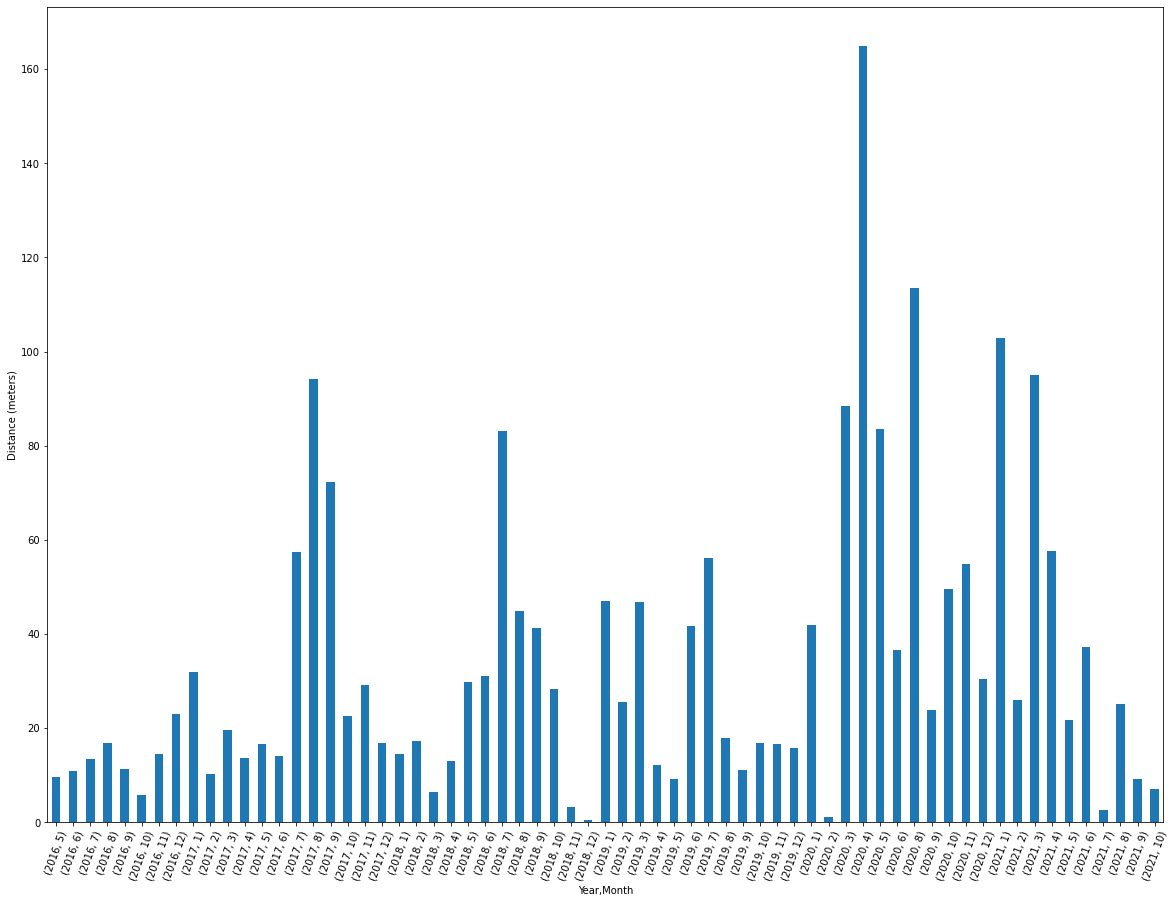

In [70]:
tracks_grouped = tracks.groupby(['Year','Month'])
tracks_grouped['Length'].sum().plot(kind='bar', figsize=(20,15))
plt.xticks(rotation=70)
plt.ylabel('Distance (meters)')